### Contagem das palavras mais usadas no Plano de governo - CIro Gomes

#### Importacao de bibliotecas

In [1]:
import pandas as pd
import numpy as np
# http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction
from sklearn.feature_extraction.text import CountVectorizer
import string
from nltk.corpus import stopwords
from nltk import *
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

### Link do plano de governo

- [Plano de governo](http://www.pdt.org.br/wp-content/uploads/2018/07/12-Passos-Para-Mudar-o-Brasil.pdf)

### Conversao pdf to text

- Utilizei esse site on-line [https://pdftotext.com/](https://pdftotext.com/)

### Leitura do arquivo transformado em texto do original em pdf

In [2]:
with open('text/plano_governo_ciro_gomes.txt', 'r', encoding='UTF-8') as pl:
    big_string = ''
    for line in pl:
        split_line = line.split(' ')
        for word in split_line:
            big_string = big_string + ' ' + word

In [3]:
# criacao de lista de simbolos de pontuacao
punctuation = string.punctuation

In [4]:
# removendo quebras de linha '\n'
big_string = big_string.replace('\n ', ' ')

In [5]:
# retirando pontuacao
for p in punctuation:
    big_string = big_string.replace(p, '')

In [6]:
# convertendo tudo para lower case
big_string = big_string.lower()

In [7]:
# checando a conversao
big_string[0:1000]

' convenção nacional do pdt brasília 20 de julho de 2018  ciro gomes précandidato do pdt à presidência da república  12  passos para mudar o brasil  \x0cpor que o brasil precisa mudar o brasil é um grande país com potencial humano e recursos naturais suficientes para ser também uma grande nação justa próspera com igualdade de oportunidades para todos os seus filhos mas essa não é hoje a nossa realidade por falta de projeto por erros estratégicos por uma visão elitista de alguns governantes desprovida até mesmo de compaixão pelos mais pobres estamos hoje divididos sofridos e em crise crise moral social econômica política e institucional e como sempre quem paga a conta é o povo  carência de transporte moderno no colapso das contas públicas com um rombo anual da ordem de r 500 bilhões incluindo a despesa com juros  o número de desempregados no brasil dobrou entre 2014 e 2018 atingindo em maio deste ano 132 milhões de brasileiras e brasileiros  pib hoje não passa de 11 do pib um terço do q

In [8]:
# comprimento da string
len(big_string)

32862

In [9]:
# nltk.download() # rodar apenas uma vez para baixar os pacotes

In [10]:
# lista de stopwords em portugues
stop_words = stopwords.words('portuguese')

In [11]:
# numero de stopwords
len(stop_words)

203

In [12]:
# aparando os detalhes
full_text = big_string
for s_word in stop_words:
    s_word = ' ' + s_word + ' '
    full_text = full_text.replace(s_word, ' ')
    full_text = full_text.replace(' é ', ' ')
    full_text = full_text.replace(' – ', ' ')
    full_text = full_text.replace(' • ', ' ')

In [13]:
# tamanho do texto apos limpeza
len(full_text)

25450

In [14]:
# quantidade de caracteres removidos
len(big_string)-len(full_text)

7412

In [15]:
# transformando a string em lista
full_text = [full_text]

In [16]:
# separando palavra por palavra
freq_full_text = full_text[0].split(' ')

### Documentacao FreqDist

- [FreqDist](http://www.nltk.org/api/nltk.html?highlight=freqdist)

In [17]:
# Contando a frequencia de cada palavra com a funcao FreqDist
freq_full_text = FreqDist(freq_full_text)

In [18]:
# as 100 palavras mais comuns
hundred_most_common = freq_full_text.most_common(100)
# removendo primeiro elemento da lista ''
hundred_most_common = hundred_most_common[1:]
# imprime as 10 primeiras
hundred_most_common[:29]

[('brasil', 41),
 ('país', 25),
 ('nacional', 23),
 ('desenvolvimento', 21),
 ('população', 18),
 ('ser', 15),
 ('hoje', 14),
 ('serviços', 14),
 ('políticas', 14),
 ('educação', 13),
 ('brasileiros', 12),
 ('saúde', 12),
 ('anos', 12),
 ('todos', 11),
 ('política', 11),
 ('milhões', 11),
 ('empregos', 11),
 ('setor', 11),
 ('governo', 11),
 ('ações', 11),
 ('ensino', 10),
 ('pessoas', 10),
 ('públicas', 9),
 ('vida', 9),
 ('público', 9),
 ('vamos', 9),
 ('mulheres', 9),
 ('precisa', 8),
 ('projeto', 8)]

In [32]:
# 
x = []
y = []
for i in hundred_most_common[0:29]:
    x.append(i[0])
    y.append(i[1])

In [34]:
d = {'palavra': x, 'frequencia': y}
df_r = pd.DataFrame(d)
df_r = df_r.sort_values(['frequencia'], ascending=0)
df_r.head()

,frequencia,palavra
0,41,brasil
1,25,país
2,23,nacional
3,21,desenvolvimento
4,18,população


In [35]:
df_r.frequencia = df_r.frequencia/df_r.loc[0, 'frequencia']

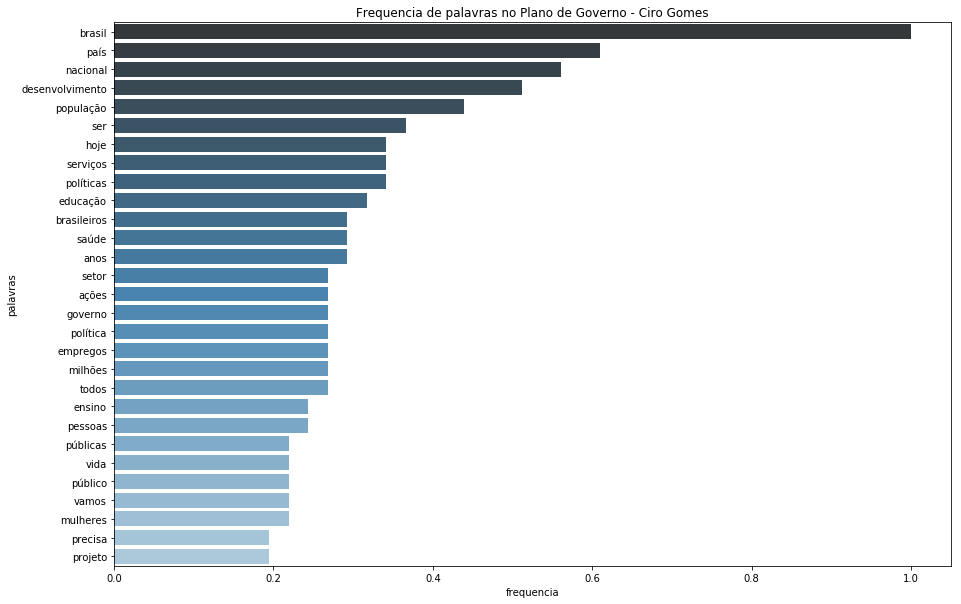

In [36]:
plt.figure(figsize=(15,10))
sns.barplot(df_r.frequencia, df_r.palavra, palette="Blues_d")
plt.title("Frequencia de palavras no Plano de Governo - Ciro Gomes")
plt.xlabel('frequencia')
plt.ylabel('palavras')
plt.show()


In [23]:
# Lista completa das 100 mais frequentes
hundred_most_common

[('brasil', 41),
 ('país', 25),
 ('nacional', 23),
 ('desenvolvimento', 21),
 ('população', 18),
 ('ser', 15),
 ('hoje', 14),
 ('serviços', 14),
 ('políticas', 14),
 ('educação', 13),
 ('brasileiros', 12),
 ('saúde', 12),
 ('anos', 12),
 ('todos', 11),
 ('política', 11),
 ('milhões', 11),
 ('empregos', 11),
 ('setor', 11),
 ('governo', 11),
 ('ações', 11),
 ('ensino', 10),
 ('pessoas', 10),
 ('públicas', 9),
 ('vida', 9),
 ('público', 9),
 ('vamos', 9),
 ('mulheres', 9),
 ('precisa', 8),
 ('projeto', 8),
 ('mil', 8),
 ('produção', 8),
 ('ciro', 7),
 ('oportunidades', 7),
 ('social', 7),
 ('ano', 7),
 ('criar', 7),
 ('empresas', 7),
 ('cerca', 7),
 ('brasileira', 7),
 ('indústria', 7),
 ('pública', 7),
 ('corrupção', 7),
 ('plano', 7),
 ('setores', 7),
 ('conhecimento', 7),
 ('fundamental', 7),
 ('qualidade', 7),
 ('necessário', 7),
 ('acesso', 7),
 ('sistema', 7),
 ('cultura', 7),
 ('grande', 6),
 ('recursos', 6),
 ('outros', 6),
 ('gerar', 6),
 ('forma', 6),
 ('apenas', 6),
 ('privado

In [24]:
words = []
for i in hundred_most_common:
    words.append(i[0])
words[:9]

['brasil',
 'país',
 'nacional',
 'desenvolvimento',
 'população',
 'ser',
 'hoje',
 'serviços',
 'políticas']

In [31]:
text = full_text[0].split(' ')
freq_exp = {}
for i in range(len(words)):
    for j in range(len(text)):
        if words[i] == text[j]:
            if text[j-1]:
                if text[j+1] == '':
                    string = text[j-1] + ' ' + text[j] + ' ' + text[j+2]
                else:
                    string = text[j-1] + ' ' + text[j] + ' ' + text[j+1]
                if not string in freq_exp:
                    freq_exp[string] = 1
                else:
                    freq_exp[string] = freq_exp[string] + 1

In [30]:
# lista das expressoes mais frequentes no texto que usam palavras mais frequentes (lista anterior)
for key, value in freq_exp.items():
    if value >=2:
        print(key, value)

projeto nacional desenvolvimento 5
plano nacional educação 2
defesa política exterior 2
62 mil homicídios 2
consolidar plano real 2
melhorar qualidade vida 2
brasil grande país 2
passos mudar brasil 2
complexo industrial defesa 2
